In [1]:
# meta-data
figure_num_and_caption = "fig_01_HadISST_global_and_annual_mean_SST_anomalies"

# Import packages

In [2]:
%matplotlib inline
import itertools
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import xarray as xr

# Make plots nice

In [3]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rcParams["figure.figsize"] = [15, 10]

# Open the data files and extract data

In [4]:
# path to the data file
data_file = Path("/data/c2/TMdata/git_geomar_de_data/HadISST/v1.x.x/data/HadISST_sst.nc")

# open data set and extract SST (mask for sst=-1000)
sst = xr.open_dataset(data_file).sst.sel(time=slice("1900-01-01", "2011-01-01"))
sst = sst.where(sst != -1000.0)

# Function definitions

In [5]:
def wgt_glob_mean(data):
    cosine_latitude = np.cos(np.pi / 180.0 * data.coords["latitude"])
    data = ((cosine_latitude * data).sum(dim=["latitude", "longitude"])
            / (cosine_latitude + 0 * data).sum(dim=["latitude", "longitude"]))
    return data

In [6]:
def ann_mean(data):
    data = data.resample(time="12M").mean(dim="time")
    return data

In [7]:
def tmp_anom(data):
    data = data - data.mean("time")
    return data

# Calculate anomalies and plot

In [8]:
sst_anomalies = tmp_anom(wgt_glob_mean(ann_mean(sst))).rename("global_and_annual_mean_SST_anomalies")

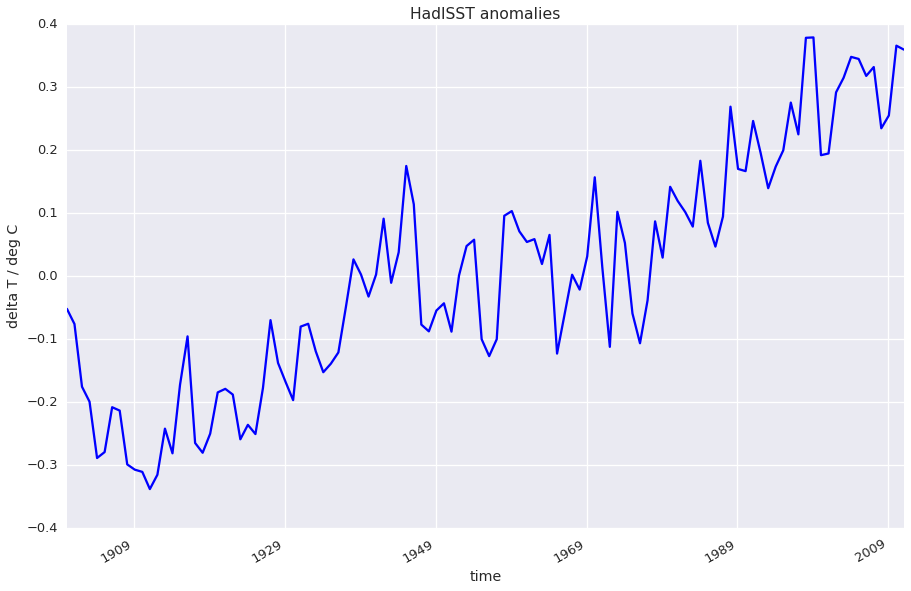

In [9]:
fig, ax = plt.subplots(1, 1)

sst_anomalies.plot()

ax.set_title("HadISST anomalies")
ax.set_ylabel("delta T / deg C")

plt.savefig("{}.png".format(figure_num_and_caption))

# Save plotted data for reference

In [10]:
xr.Dataset({
    "global_and_annual_mean_SST_anomalies": sst_anomalies
}).to_netcdf("{}.nc".format(figure_num_and_caption))

# Exact version number of the data

In [11]:
!(cd /data/c2/TMdata/git_geomar_de_data/HadISST/v1.x.x/; \
  pwd -P; \
  /home/wrath/TM/software/miniconda3_latest/envs/git/bin/git describe;)

/data/c2/TMdata/git_geomar_de_data/HadISST/v1.x.x
v1.3.0


# Software that was used

In [12]:
!(conda list)

# packages in environment at /home/wrath/TM/software/miniconda3_20170727/envs/py3_std:
#
alabaster                 0.7.10                   py35_1    conda-forge
anaconda-client           1.6.5                      py_0    conda-forge
aospy                     0.1.2                    py35_0    conda-forge
asn1crypto                0.22.0                   py35_0    conda-forge
astroid                   1.5.3                    py35_0    conda-forge
babel                     2.4.0                    py35_0    conda-forge
basemap                   1.1.0                    py35_2    conda-forge
basemap-data-hires        1.1.0                         0    conda-forge
biggus                    0.15.0                   py35_0    conda-forge
bkcharts                  0.2                      py35_0    conda-forge
blas                      1.1                    openblas    conda-forge
bleach                    2.0.0                    py35_0    conda-forge
bokeh                     0.12.6   